In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset from ../Data
df = pd.read_csv("../Data/synthetic_employee_dataset.csv")

# Select only numerical columns for simplicity
x = df["YearsExperience"].values
y = df["Salary"].values


In [2]:
def gaussian_kernel(x_i, x_q, tau):
    return np.exp(- (x_i - x_q) ** 2 / (2 * tau ** 2))

def predict_lwr(x_train, y_train, x_query, tau):
    m = len(x_train)
    y_pred = []

    for x_q in x_query:
        # Compute weights
        weights = np.array([gaussian_kernel(x_i, x_q, tau) for x_i in x_train])

        # Create weighted design matrix
        W = np.diag(weights)
        X_mat = np.vstack([np.ones(m), x_train]).T
        theta = np.linalg.pinv(X_mat.T @ W @ X_mat) @ X_mat.T @ W @ y_train

        y_q = np.array([1, x_q]) @ theta
        y_pred.append(y_q)

    return np.array(y_pred)


/var/folders/h4/srr2qc116dg83xvd0rkbfh6c0000gn/T/ipykernel_21337/767664974.py:15: RuntimeWarning: divide by zero encountered in matmul
  theta = np.linalg.pinv(X_mat.T @ W @ X_mat) @ X_mat.T @ W @ y_train
/var/folders/h4/srr2qc116dg83xvd0rkbfh6c0000gn/T/ipykernel_21337/767664974.py:15: RuntimeWarning: overflow encountered in matmul
  theta = np.linalg.pinv(X_mat.T @ W @ X_mat) @ X_mat.T @ W @ y_train
/var/folders/h4/srr2qc116dg83xvd0rkbfh6c0000gn/T/ipykernel_21337/767664974.py:15: RuntimeWarning: invalid value encountered in matmul
  theta = np.linalg.pinv(X_mat.T @ W @ X_mat) @ X_mat.T @ W @ y_train


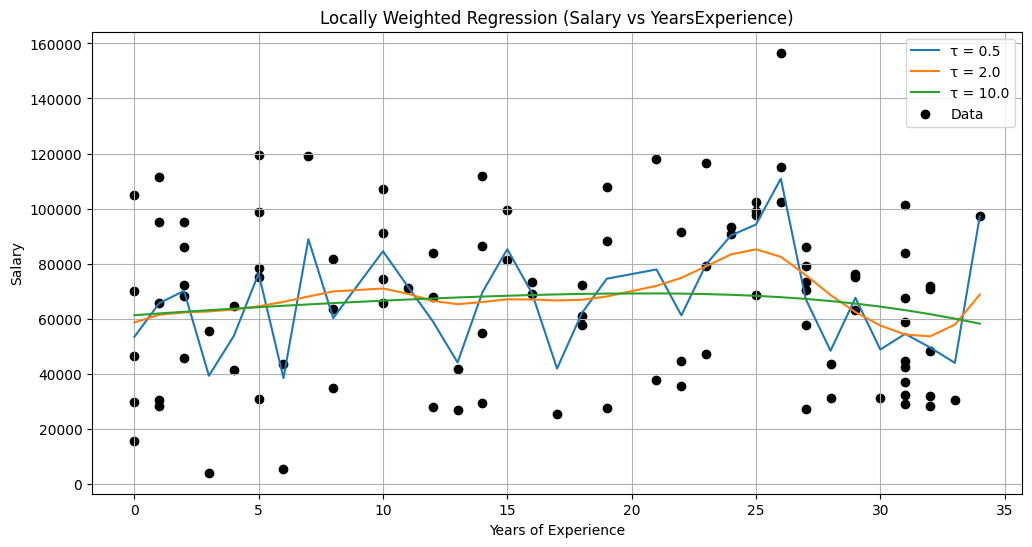

In [3]:
# Try different values of tau
taus = [0.5, 2.0, 10.0]

# Sort inputs for smooth plotting
x_sorted_idx = np.argsort(x)
x_sorted = x[x_sorted_idx]
y_sorted = y[x_sorted_idx]

plt.figure(figsize=(12, 6))
for tau in taus:
    y_lwr = predict_lwr(x_sorted, y_sorted, x_sorted, tau)
    plt.plot(x_sorted, y_lwr, label=f"τ = {tau}")

plt.scatter(x, y, color='black', label='Data')
plt.title("Locally Weighted Regression (Salary vs YearsExperience)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


## 🧪 Observations

- With **small τ (e.g., 0.5)**: the model fits very closely to local data (risk of overfitting)
- With **large τ (e.g., 10.0)**: the model behaves like global linear regression (underfitting)
- A **moderate τ** provides a smooth curve that captures local trends in the data

Locally Weighted Regression offers **flexibility** and is useful when the data has **non-linear patterns** that global models can't capture.
